### sklearn.linear_model.Ridge
* class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [16]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge , Lasso , ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings

warnings.filterwarnings('ignore')

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./datasets/housing.csv', header=None, delimiter=r"\s+", names=column_names)

y_target = df['MEDV']
X_data = df.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size =0.3, random_state=156)

In [17]:
# cross_val_score
# cross _ val _ score
ridge= Ridge(alpha= 10)
neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores :', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-39.368 -21.739 -37.434 -26.32  -17.839]
 5 folds 의 개별 RMSE scores : [6.274 4.663 6.118 5.13  4.224]
 5 folds 의 평균 RMSE : 5.282 


In [18]:
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [19]:
ridge.coef_

array([-0.09899991,  0.07158454, -0.03587402,  1.95096359, -1.97071905,
        3.200516  , -0.0056562 , -1.46784831,  0.32452012, -0.01618401,
       -0.70840332,  0.01143944, -0.61772405])

In [20]:
# ridge에 사용될 alpha 파라미터 값들 정의 
alphas = [0, 0.1, 1, 10, 100]

# alphas list의 값들 iteration 하면서 alpha에 따른 평균 rmse 구하기
for alpha in alphas :
  ridge = Ridge(alpha = alpha) # 규제강도 하나씩

  # cross_val_score이용해서 5 fold 평균 RMSE계산
  neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring = 'neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.162
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.165
alpha 1 일 때 5 folds 의 평균 RMSE : 5.209
alpha 10 일 때 5 folds 의 평균 RMSE : 5.282
alpha 100 일 때 5 folds 의 평균 RMSE : 5.379


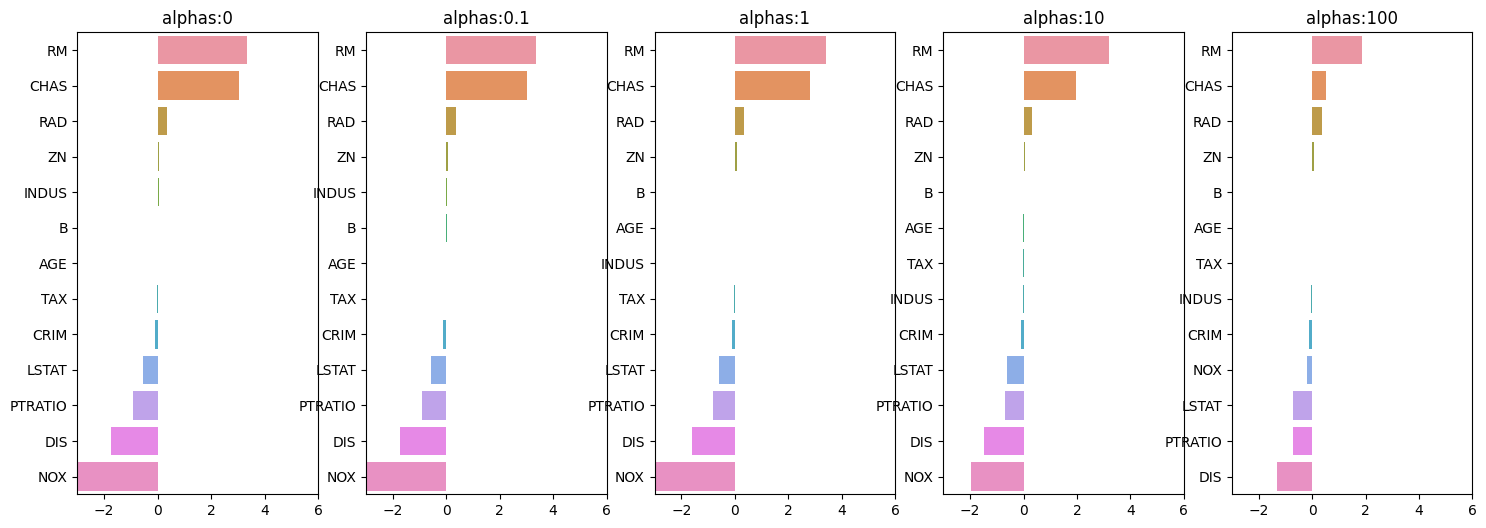

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀계수값들 시각화하기 
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# df에 회귀계수값 저장할거야
coeff_df = pd.DataFrame()

# alphas 리스트값 차례대로 입력 , pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  ridge= Ridge(alpha= alpha)
  ridge.fit(X_train, y_train)

  # 회귀계수들을 컬럼으로 추가할거니까 시리즈로 만들고 추가
  coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
  colname = 'alphas:' + str(alpha)
  coeff_df[colname] = coeff

  # 막대로 시각화하기 높은순으로
  coeff = coeff.sort_values(ascending =False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y = coeff.index, ax=axs[pos])

plt.show()

In [22]:
# ridge에 사용될 alpha 파라미터 값들 정의 
alphas = [0, 0.1, 1, 10, 100]

# alphas list의 값들 iteration 하면서 alpha에 따른 평균 rmse 구하기
for alpha in alphas :
    ridge = Ridge(alpha = alpha) # 규제강도 하나씩
    # cross_val_score이용해서 5 fold 평균 RMSE계산
    ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    print(f'alpha {alpha} 일 때  RMSE : {rmse:.3f}')

alpha 0 일 때  RMSE : 4.159
alpha 0.1 일 때  RMSE : 4.153
alpha 1 일 때  RMSE : 4.148
alpha 10 일 때  RMSE : 4.207
alpha 100 일 때  RMSE : 4.400


### sklearn.linear_model.Lasso
* class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [23]:
# ridge에 사용될 alpha 파라미터 값들 정의 
alphas = [0, 0.1, 1, 10, 100]

# alphas list의 값들 iteration 하면서 alpha에 따른 평균 rmse 구하기
for alpha in alphas :
  lasso = Lasso(alpha = alpha) # 규제강도 하나씩

  # cross_val_score이용해서 5 fold 평균 RMSE계산
  neg_mse_scores = cross_val_score(lasso, X_train, y_train, scoring = 'neg_mean_squared_error', cv=5)
  avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
  print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.162
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.336
alpha 1 일 때 5 folds 의 평균 RMSE : 5.618
alpha 10 일 때 5 folds 의 평균 RMSE : 6.600
alpha 100 일 때 5 folds 의 평균 RMSE : 8.586


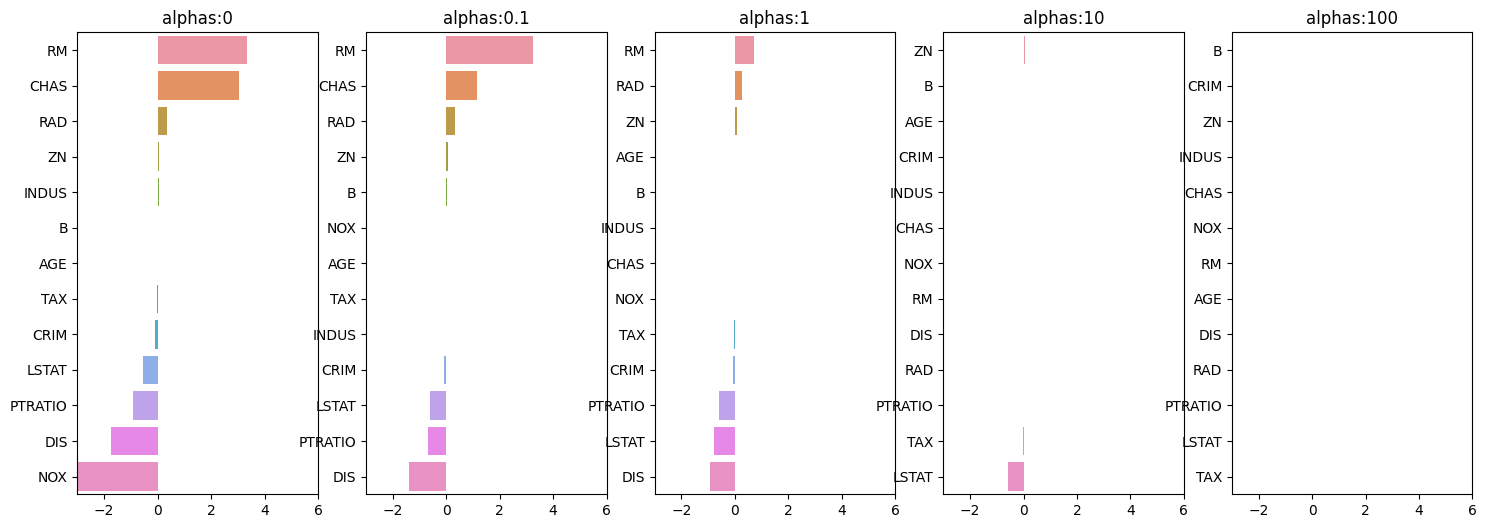

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀계수값들 시각화하기 
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# df에 회귀계수값 저장할거야
coeff_df = pd.DataFrame()

# alphas 리스트값 차례대로 입력 , pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
  lasso= Lasso(alpha= alpha)
  lasso.fit(X_train, y_train)

  # 회귀계수들을 컬럼으로 추가할거니까 시리즈로 만들고 추가
  coeff = pd.Series(data = lasso.coef_, index = X_data.columns)
  colname = 'alphas:' + str(alpha)
  coeff_df[colname] = coeff

  # 막대로 시각화하기 높은순으로
  coeff = coeff.sort_values(ascending =False)
  axs[pos].set_title(colname)
  axs[pos].set_xlim(-3,6)
  sns.barplot(x=coeff.values, y = coeff.index, ax=axs[pos])

plt.show()

In [31]:
lasso= Lasso(alpha=10)
lasso.fit(X_train, y_train)

# 회귀계수들을 컬럼으로 추가할거니까 시리즈로 만들고 추가
coeff = pd.Series(data = lasso.coef_, index = X_data.columns)

In [32]:
coeff

CRIM      -0.000000
ZN         0.046677
INDUS     -0.000000
CHAS       0.000000
NOX        0.000000
RM         0.000000
AGE        0.006391
DIS       -0.000000
RAD        0.000000
TAX       -0.006589
PTRATIO   -0.000000
B          0.009976
LSTAT     -0.594592
dtype: float64

### sklearn.linear_model.ElasticNet
* class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [33]:
from sklearn.linear_model import Lasso, ElasticNet
import numpy as np

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고, 회귀 계수값들을 DataFrame으로 반환해주는 함수
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    
    if verbose:
        print(f'##### {model_name} #####')
    
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        # neg_mean_squared_error를 활용하여 평가 지표를 반환
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, 
                                         scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'alpha {param} RMSE: {avg_rmse:.3f}')
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀계수 추출
        model.fit(X_data_n, y_target_n)
        
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = f'alpha: {param}'
        coeff_df[colname] = coeff
    
    return coeff_df

# 예를 들어, Ridge 회귀 모델의 alpha 값과 데이터를 넣어서 함수를 호출하는 방법:
# coeff_df_ridge = get_linear_reg_eval('Ridge', params=[0.1, 1, 10], X_data_n=X_data, y_target_n=y_target)

In [35]:
# alpha 정리 -> 함수 적용
ElasticNet_alphas = [0.07, 0.1, 0.5, 1,3]
coeff_lasso_df = get_linear_reg_eval('ElasticNet', params=lasso_alphas, X_data_n= X_train, y_target_n=y_train)

##### ElasticNet #####
alpha 0.07 RMSE: 5.310
alpha 0.1 RMSE: 5.320
alpha 0.5 RMSE: 5.405
alpha 1 RMSE: 5.563
alpha 3 RMSE: 6.056


In [36]:
# alpha 정리 -> 함수 적용
Ridge_alphas = [0.07, 0.1, 0.5, 1,3]
coeff_lasso_df = get_linear_reg_eval('Ridge', params=lasso_alphas, X_data_n= X_train, y_target_n=y_train)

##### Ridge #####
alpha 0.07 RMSE: 5.164
alpha 0.1 RMSE: 5.165
alpha 0.5 RMSE: 5.186
alpha 1 RMSE: 5.209
alpha 3 RMSE: 5.253


In [37]:
# alpha 정리 -> 함수 적용
Lasso_alphas = [0.07, 0.1, 0.5, 1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n= X_train, y_target_n=y_train)

##### Lasso #####
alpha 0.07 RMSE: 5.329
alpha 0.1 RMSE: 5.336
alpha 0.5 RMSE: 5.394
alpha 1 RMSE: 5.618
alpha 3 RMSE: 6.245


In [38]:
np.log(0.8)

-0.2231435513142097

In [39]:
np.log(0.9)

-0.10536051565782628